In [41]:
import pandas as pd
import numpy as np
import csv
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import statistics
import seaborn as sns

In [49]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [50]:
syd_humid = df.loc[df['Location'] == 'Sydney']
syd_humid

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,22.0,20.0,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,20.0,7.0,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,15.0,13.0,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,W,17.0,19.0,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


In [51]:
maxtempSyd = syd_humid["MaxTemp"]
gustspeedSyd = syd_humid["WindGustSpeed"]

In [52]:
maxtempSyd = maxtempSyd[0:100]
maxtempSyd = np.array(maxtempSyd)
gustspeedSyd = gustspeed[0:100]
gustspeedSyd  = np.array(gustspeedSyd)

Text(0.5, 0.98, 'Sydney Max Temperature vs Wind Gust Speed')

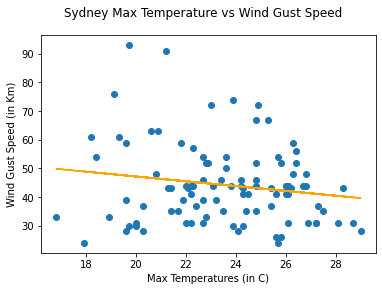

In [79]:
plt.xlabel('Max Temperatures (in C)')
plt.ylabel('Wind Gust Speed (in Km)')
x = maxtempSyd
y = gustspeedSyd
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color = "orange")
plt.suptitle('Sydney Max Temperature vs Wind Gust Speed')

In [54]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.783
Date:                Sun, 25 Apr 2021   Prob (F-statistic):             0.0984
Time:                        17:44:44   Log-Likelihood:                -401.28
No. Observations:                 100   AIC:                             806.6
Df Residuals:                      98   BIC:                             811.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.9612     11.910      5.371      0.000      40.327      87.595
x1            -0.8384      0.503     -1.668      0.098      -1.836       0.159
==============================================================================
Omnibus:                       18.999   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.759
Skew:                           0.990   Prob(JB):                     6.93e-06
Kurtosis:                       4.335   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
mel_humid = df.loc[df['Location'] == 'Melbourne']
mel_humid

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,W,37.0,35.0,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,WSW,30.0,35.0,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,W,17.0,24.0,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,N,9.0,7.0,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,NNE,24.0,30.0,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70388,2017-06-21,Melbourne,7.8,13.5,0.6,0.6,0.0,NNW,24.0,W,S,2.0,9.0,100.0,80.0,1028.8,1028.4,7.0,7.0,11.2,12.7,No,No
70389,2017-06-22,Melbourne,6.7,14.1,0.2,0.6,0.0,N,24.0,NNE,N,9.0,11.0,93.0,56.0,1028.2,1024.8,7.0,7.0,7.5,13.5,No,No
70390,2017-06-23,Melbourne,7.4,14.9,0.0,1.6,6.0,NNW,44.0,N,N,17.0,19.0,77.0,63.0,1018.8,1013.8,1.0,7.0,9.1,12.5,No,Yes
70391,2017-06-24,Melbourne,8.3,12.3,1.4,1.8,5.6,SW,30.0,WNW,S,11.0,2.0,75.0,63.0,1018.7,1017.4,2.0,7.0,9.6,11.2,Yes,No


In [64]:
maxtempMel = mel_humid["MaxTemp"]
gustspeedMel = mel_humid["WindGustSpeed"]

In [65]:
maxtempMel = maxtempMel[0:100]
maxtempMel = np.array(maxtempMel)
gustspeedMel = gustspeed[0:100]
gustspeedMel  = np.array(gustspeedMel)

Text(0.5, 0.98, 'Melbourne Max Temperature vs Wind Gust Speed')

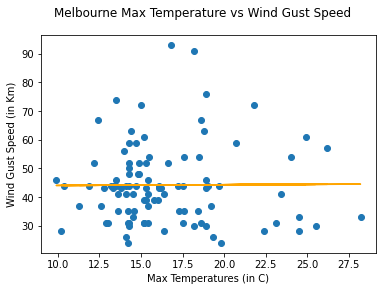

In [80]:
plt.xlabel('Max Temperatures (in C)')
plt.ylabel('Wind Gust Speed (in Km)')
x = maxtempMel
y = gustspeedMel
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color = "orange")
plt.suptitle('Melbourne Max Temperature vs Wind Gust Speed')

In [67]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.004135
Date:                Sun, 25 Apr 2021   Prob (F-statistic):              0.949
Time:                        17:49:36   Log-Likelihood:                -402.68
No. Observations:                 100   AIC:                             809.4
Df Residuals:                      98   BIC:                             814.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8213      6.350      6.901      0.000      31.221      56.422
x1             0.0244      0.379      0.064      0.949      -0.727       0.776
==============================================================================
Omnibus:                       24.811   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.342
Skew:                           1.174   Prob(JB):                     2.12e-08
Kurtosis:                       4.724   Cond. No.                         77.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
bris_humid = df.loc[df['Location'] == 'Brisbane']
bris_humid

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
84007,2008-07-01,Brisbane,10.3,25.2,0.0,1.4,9.5,WNW,26.0,SSW,W,6.0,15.0,81.0,37.0,1019.6,1014.8,0.0,1.0,14.9,24.6,No,No
84008,2008-07-02,Brisbane,8.1,22.9,0.0,2.0,9.8,W,30.0,W,WNW,15.0,19.0,41.0,30.0,1018.8,1015.0,0.0,0.0,16.2,22.4,No,No
84009,2008-07-03,Brisbane,9.7,22.4,0.0,5.8,9.4,E,22.0,SW,E,7.0,15.0,55.0,52.0,1021.4,1019.1,1.0,4.0,15.4,21.3,No,No
84010,2008-07-04,Brisbane,11.8,20.0,0.8,1.8,1.1,SW,24.0,SW,SSE,9.0,7.0,76.0,53.0,1023.5,1021.7,7.0,7.0,14.1,19.6,No,No
84011,2008-07-05,Brisbane,12.3,16.7,0.0,2.0,0.3,S,37.0,S,SSW,11.0,7.0,81.0,89.0,1027.3,1026.2,7.0,8.0,16.1,15.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87195,2017-06-21,Brisbane,12.2,23.4,0.0,4.0,9.2,WSW,20.0,SW,SSW,7.0,6.0,61.0,44.0,1023.4,1021.3,1.0,4.0,17.2,23.3,No,No
87196,2017-06-22,Brisbane,13.7,22.7,0.0,3.4,7.2,SE,20.0,SW,ESE,6.0,4.0,62.0,55.0,1026.0,1022.4,2.0,3.0,17.8,20.5,No,No
87197,2017-06-23,Brisbane,10.3,23.7,0.0,3.2,9.4,W,24.0,SW,W,6.0,9.0,71.0,37.0,1023.3,1018.4,1.0,3.0,15.2,23.1,No,No
87198,2017-06-24,Brisbane,10.4,24.5,0.0,3.4,8.9,S,17.0,S,WNW,2.0,2.0,75.0,33.0,1018.6,1015.4,7.0,5.0,14.3,24.0,No,No


In [75]:
maxtempBris = bris_humid["MaxTemp"]
gustspeedBris = bris_humid["WindGustSpeed"]

In [76]:
maxtempBris = maxtempBris[0:100]
maxtempBris = np.array(maxtempBris)
gustspeedBris = gustspeed[0:100]
gustspeedBris  = np.array(gustspeedBris)

Text(0.5, 0.98, 'Brisbane Max Temperature vs Wind Gust Speed')

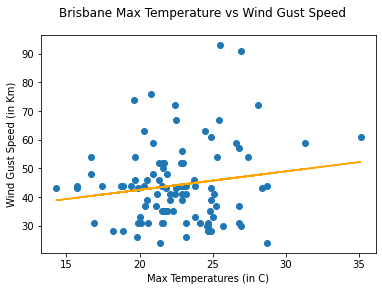

In [81]:
plt.xlabel('Max Temperatures (in C)')
plt.ylabel('Wind Gust Speed (in Km)')
x = maxtempBris
y = gustspeedBris
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color = "orange")
plt.suptitle('Brisbane Max Temperature vs Wind Gust Speed')

In [78]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.477
Date:                Sun, 25 Apr 2021   Prob (F-statistic):              0.119
Time:                        17:53:39   Log-Likelihood:                -401.43
No. Observations:                 100   AIC:                             806.9
Df Residuals:                      98   BIC:                             812.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6257      9.370      3.162      0.002      11.030      48.221
x1             0.6453      0.410      1.574      0.119      -0.168       1.459
==============================================================================
Omnibus:                       20.622   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.824
Skew:                           1.039   Prob(JB):                     1.50e-06
Kurtosis:                       4.455   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""